# COSI 120A - Assignment 0 - Kmeans & KNN

### Q2. Write your own code of K-means clustering. Do not copy online codes. Test it on iris dataset, calculate the NMI. (15 points)

In [ ]:
# import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [34]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Original

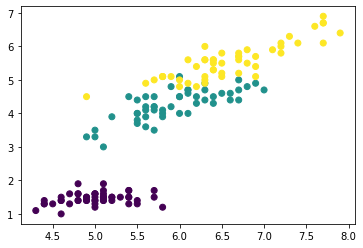

In [42]:
# Choose 2 dimension to draw the original clusters
x_axis = X[:,0]
y_axis = X[:,2]


plt.scatter(x_axis, y_axis, c=y)
plt.show()

### My Kmeans

In [43]:
def MYkmeans(data, k):
    """k-means
    
    k       - number of clusters
    data      - ndarray(m, n)
    """
    
    m, n = data.shape # m：number of data，n：number of features
    result = np.empty(m, dtype=np.int) # the cluster result of m datapoints
    centroid = data[np.random.choice(np.arange(m), k, replace=False)] # random choose k from m datapoints as centroids
    
    while True: # iteration
        d = np.square(np.repeat(data, k, axis=0).reshape(m, k, n) - centroid)
        distance = np.sqrt(np.sum(d, axis=2)) # ndarray(m, k)，distance between datapoints to k centroids，m rows
        index_min = np.argmin(distance, axis=1) # nearest index to datapoints
        
        if (index_min == result).all(): # if k does not change
            return result, centroid, distance
        
        result[:] = index_min # redo clustering
        for i in range(k): # iterate centroids 
            items = data[result==i] #  find the result of the current centroid
            centroid[i] = np.mean(items, axis=0) 

In [53]:
pred, centroid, distance = MYkmeans(X, k=3)

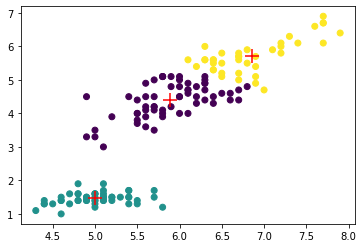

In [56]:
# Choose 2 dimension to draw the clusters with MYkmeans
x1_axis = X[:,0]
y1_axis = X[:,2]


plt.scatter(x1_axis, y1_axis, c=pred)
plt.scatter(centroid[:, 0], centroid[:, 2], color='red',marker='+',s=180); # 画出质心, s定义的大小
plt.show()


### Scikit-learn KMeans

In [79]:
# scikit-learn KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3).fit(X)
pred_skl = kmeans.labels_
centroid_skl = kmeans.cluster_centers_



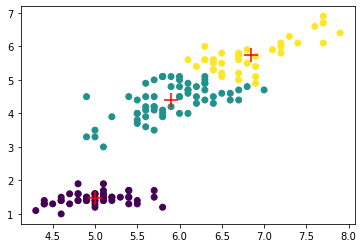

In [80]:
# Choose 2 dimension to draw the clusters with MYkmeans
x1_axis = X[:,0]
y1_axis = X[:,2]


plt.scatter(x1_axis, y1_axis, c=pred_skl)
plt.scatter(centroid_skl[:, 0], centroid_skl[:, 2], color='red',marker='+',s=180); # 画出质心, s定义的大小
plt.show()


### My NMI v.s.  Scikit-learn NMI

In [108]:
import math
import numpy as np
from sklearn import metrics

def NMI(A,B):
    total = len(A)
    A_ids = set(A)
    B_ids = set(B)
    MI = 0
    eps = 1.4e-45
    for idA in A_ids:
        for idB in B_ids:
            idAOccur = np.where(A==idA)
            idBOccur = np.where(B==idB)
            idABOccur = np.intersect1d(idAOccur,idBOccur)
            px = 1.0*len(idAOccur[0])/total
            py = 1.0*len(idBOccur[0])/total
            pxy = 1.0*len(idABOccur)/total
            MI = MI + pxy*math.log(pxy/(px*py)+eps,2)
    Hx = 0
    for idA in A_ids:
        idAOccurCount = 1.0*len(np.where(A==idA)[0])
        Hx = Hx - (idAOccurCount/total)*math.log(idAOccurCount/total+eps,2)
    Hy = 0
    for idB in B_ids:
        idBOccurCount = 1.0*len(np.where(B==idB)[0])
        Hy = Hy - (idBOccurCount/total)*math.log(idBOccurCount/total+eps,2)
    MIhat = 2.0*MI/(Hx+Hy)
    return MIhat

if __name__ == '__main__':
    A = y
    B = pred
    print ('MyNMI :',NMI(A,B))
    print ('Scikit-learn NMI:',metrics.normalized_mutual_info_score(A,B))

MyNMI : 0.7419116631817839
Scikit-learn NMI: 0.7419116631817836


### Q3. Write your own code of K-nearest neighbor classifier. Do not copy online codes. Test it on iris dataset, calculate the accuracy. (15 points)

### My KNN

In [129]:
from collections import Counter  

def KNN(X_test,k):
    pred = []
    for x in X_test:
        # calculate the Euclidean distance of new datapoints to given data
        distance = [np.sqrt(np.sum(np.power(a - x, 2))) for a in X_train]
        # sort the distance in ascending order, np.argsort return INDEX!!!!!!
        indexSort = np.argsort(distance)
        # get target value of the k nearest neighbours 
        nearK_y = [y_train[i] for i in indexSort[:k]]
        # count the frequency of the k nearest neighbours , return the target value of the most frequent one
        y_predict = Counter(nearK_y).most_common(1)[0][0]
        pred.append(y_predict)
    return pred


### My accuracy

In [139]:
# Accuracy
def Accuracy():
    count = np.sum(pred == y_test)
    acc=np.divide(count,len(X_test))
    print("the accurate of MYKNN:",round(acc,4))

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
  
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.25, random_state = 33)

ss = StandardScaler()


X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [141]:
pred = KNN(X_test,5)
Accuracy()

the accurate of MYKNN: 0.8947


### Scikit-learn KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_predict = knc.predict(X_test)

print ('The accuracy of K-Nearest Neighbor Classifier is', knc.score(X_test, y_test))

from sklearn.metrics import classification_report

print (classification_report(y_test, y_predict, target_names = iris.target_names))

The accuracy of K-Nearest Neighbor Classifier is 0.8947368421052632
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.79      0.88        19

    accuracy                           0.89        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.92      0.89      0.90        38

